In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing function
def preprocess_data(file_path, date_col=None, date_format='%Y', set_index=True):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Standardize column names
    data.columns = data.columns.str.lower().str.replace(' ', '_', regex=True)
    # Standardize column names: convert to lower case and replace spaces with underscores
    
    # Parse the date column if specified
    if date_col and date_col in data.columns:
        data[date_col] = pd.to_datetime(data[date_col], format=date_format)
        if set_index:
            data.set_index(date_col, inplace=True)
    
    # Handle missing values (example: fill with mean or forward fill)
    data.fillna(method='ffill', inplace=True)
    
    return data


In [11]:
#function to aggregate data by year and sector
def aggregate_by_sector(data, sector_col, energy_col, sector_name):
    # Filter the data for the given sector
    sector_data = data[data[sector_col] == sector_name]
    # Group by year and sum the energy consumption
    yearly_consumption = sector_data.groupby(sector_data.index).agg({energy_col: 'sum'})
    return yearly_consumption


In [19]:
#function to aggregate Data by Energy Product 
def aggregate_by_product(data, sector, product_col='energy_products'):
    # Filter data for the given sector
    sector_data = data[data['sector'].str.strip().str.lower() == sector.lower()]
    
    # Aggregate consumption by energy product
    aggregated_data = sector_data.groupby(product_col)['consumption_ktoe'].sum().sort_values(ascending=False).reset_index()
    
    return aggregated_data

In [12]:
#function to plot the energy consumption over time for a given sector.
def plot_sector_consumption(yearly_consumption, sector_name, energy_col):
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_consumption.index.year, yearly_consumption[energy_col], marker='o', linestyle='-')
    plt.title(f'Energy Consumption for {sector_name} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Consumption (ktoe)')
    plt.grid(True)
    plt.show()

In [22]:
# Define a consistent color palette for bar graph items
color_palette = sns.color_palette("tab10", n_colors=len(total_energy_consumption['energy_products'].unique()))

# Create a dictionary to map each energy product to a color
color_mapping = {product: color for product, color in zip(total_energy_consumption['energy_products'].unique(), color_palette)}

#function to visualize energy product consumption values
def plot_product_consumption(aggregated_data, sector):
    plt.figure(figsize=(12, 8))
    # Use the 'energy_products' column to map colors
    bar_colors = aggregated_data['energy_products'].map(color_mapping).tolist()
    
    sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)
    plt.title(f'Energy Product Consumption for {sector.capitalize()} Sector')
    plt.xlabel('Consumption (ktoe)')
    plt.ylabel('Energy Products')
    plt.show()


In [8]:
#load and preprocess data
# Adjust the path and parameters according to your specific files and their formats
energy_exports = preprocess_data(r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Energy\ExportsofEnergyProducts2005to2020.csv", date_col='year')
energy_imports = preprocess_data(r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Energy\ImportsofEnergyProducts2005to2020.csv", date_col='year')
total_energy_consumption = preprocess_data(r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Energy\TotalFinalEnergyConsumption2009to2019.csv", date_col='year')
fuel_mix = preprocess_data(r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Energy\AnnualFuelMixforElectricityGenerationbyEnergyProducts2005toJun2021.csv", date_col='year')
grid_emissions = preprocess_data(r"C:\Users\Ken\Documents\Code Projects\Data_ML_Projects\MLProjectClimateResearch\ClimateResearchProject\Data\Energy\ElectricityGridEmissionFactorsandUpstreamFugitiveMethaneEmissionFactor.csv", date_col='year')


C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2975596356.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2975596356.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2975596356.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2975596356.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Ken\App

In [16]:
print(total_energy_consumption[sector_col].unique())

['Commerce and Services-related' 'Households' 'Industry-related' 'Others'
 'Transport-related']


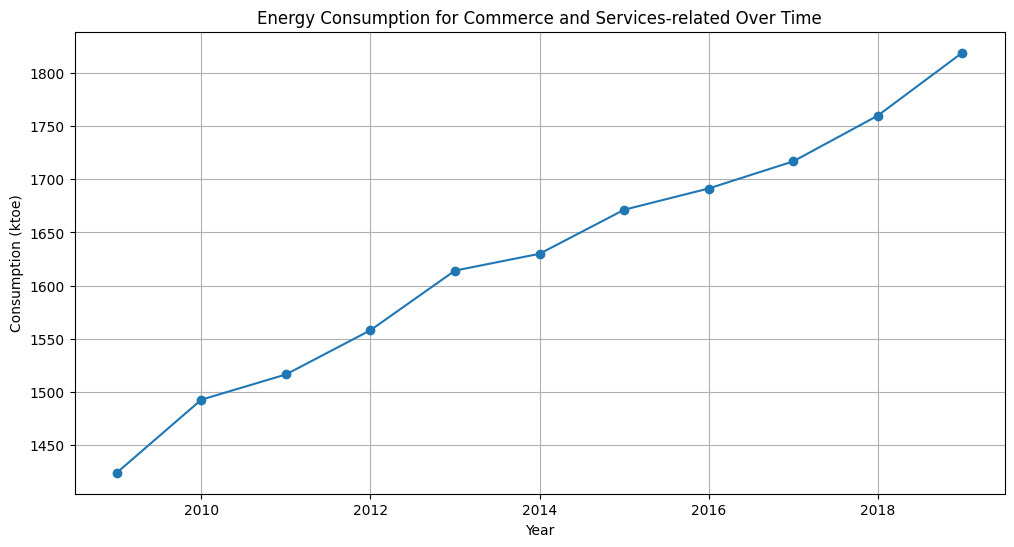

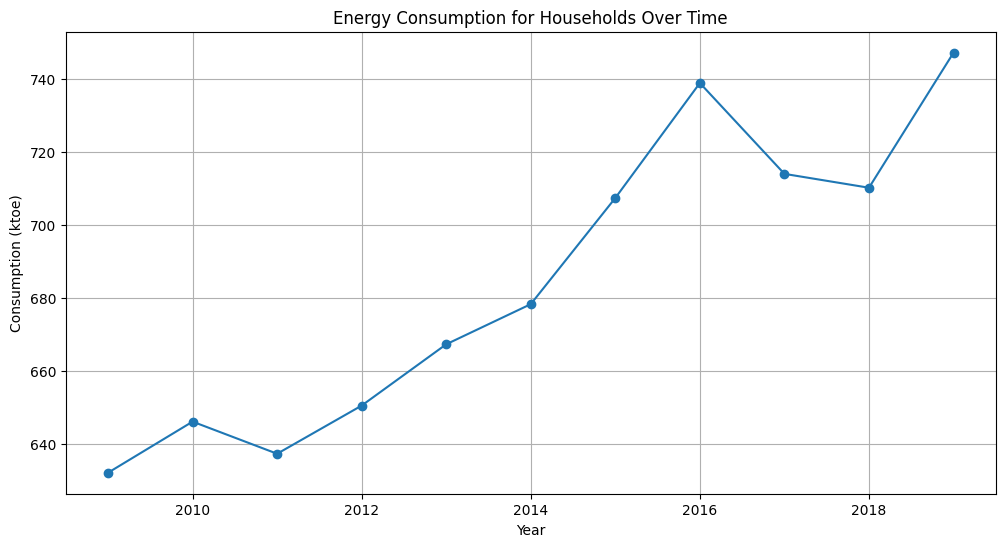

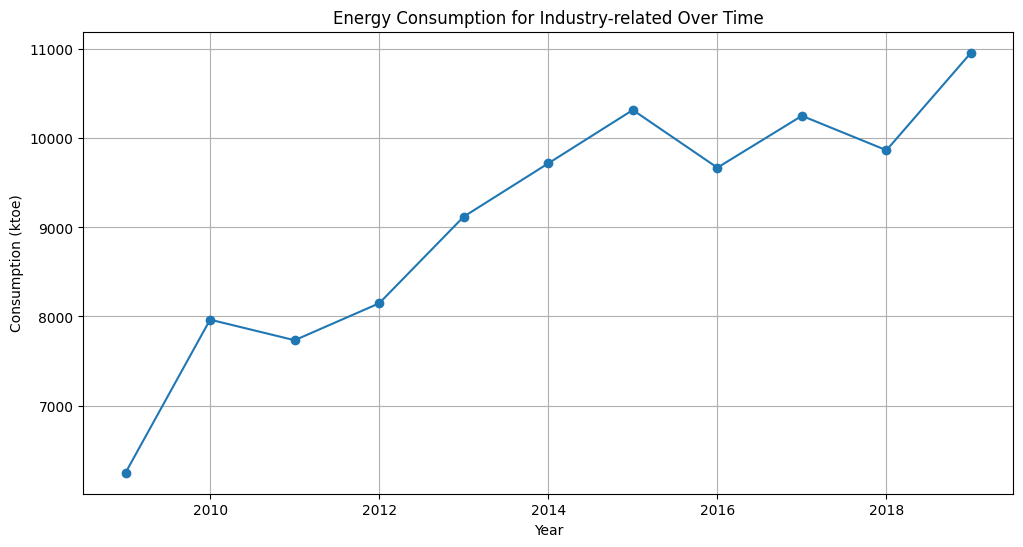

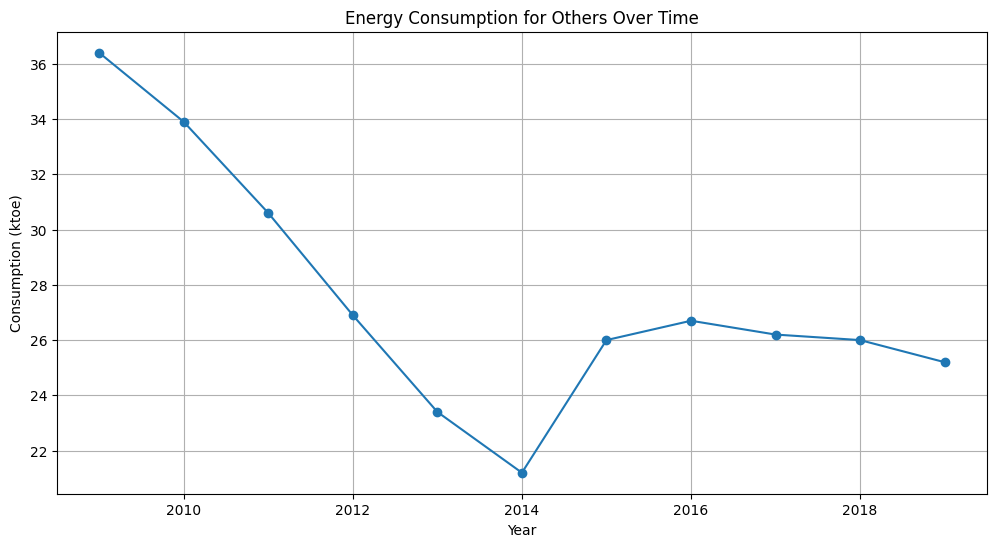

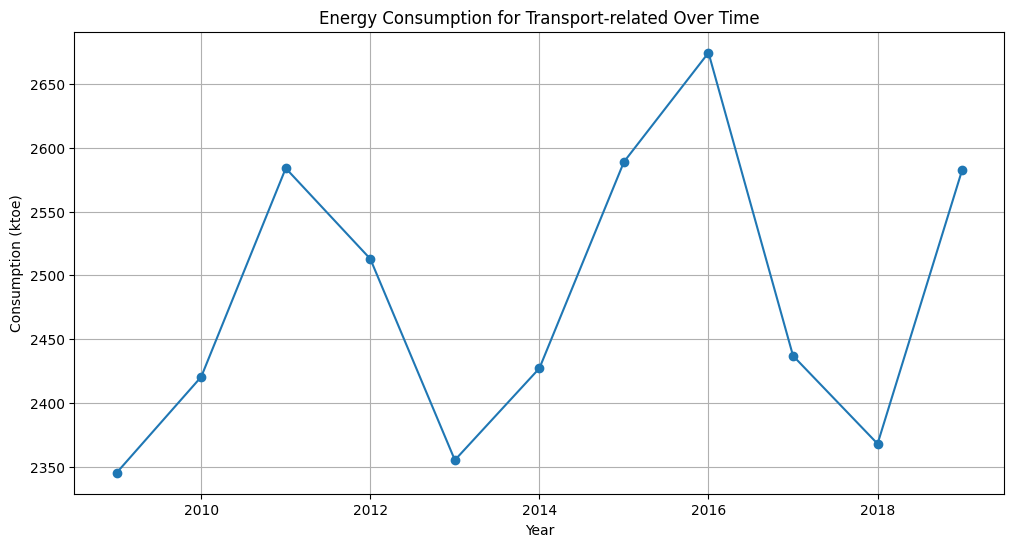

In [18]:
# Call the functions to analyze and visualize Data

# Define the column names based on dataset
sector_col = 'sector'  # Adjust based on actual column name
energy_col = 'consumption_ktoe'  # Adjust based on actual column name

# Retrieve the list of unique sectors from the data
unique_sectors = total_energy_consumption[sector_col].unique()

# Loop through each unique sector and plot the data
for sector_name in unique_sectors:
    # Aggregate data by sector
    sector_consumption = aggregate_by_sector(total_energy_consumption, sector_col, energy_col, sector_name)
    
    # If the resulting DataFrame is not empty, plot the data
    if not sector_consumption.empty:
        plot_sector_consumption(sector_consumption, sector_name, energy_col)
    else:
        print(f"No consumption data available for sector: {sector_name}")

C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2037337240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)


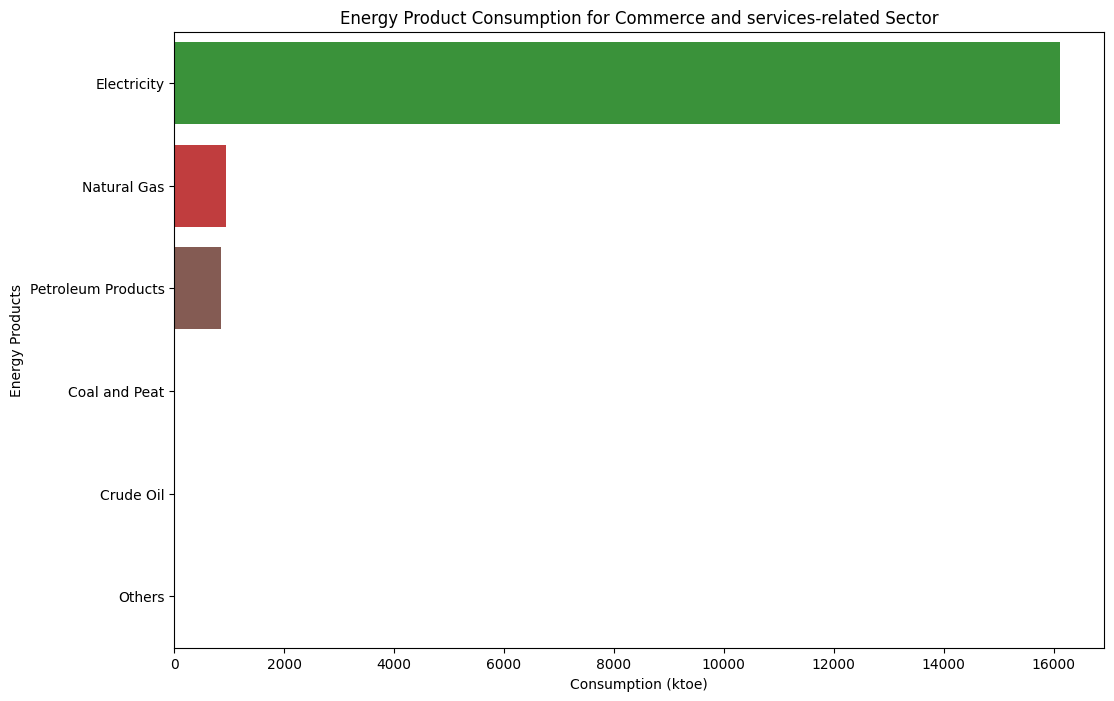

C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2037337240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)


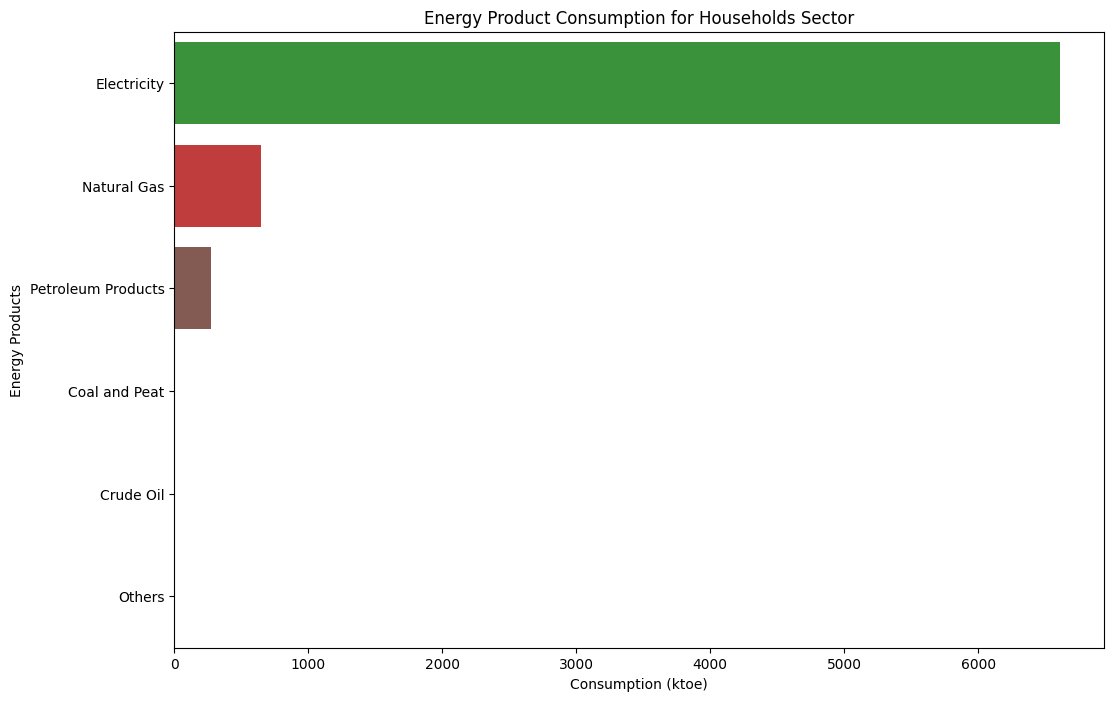

C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2037337240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)


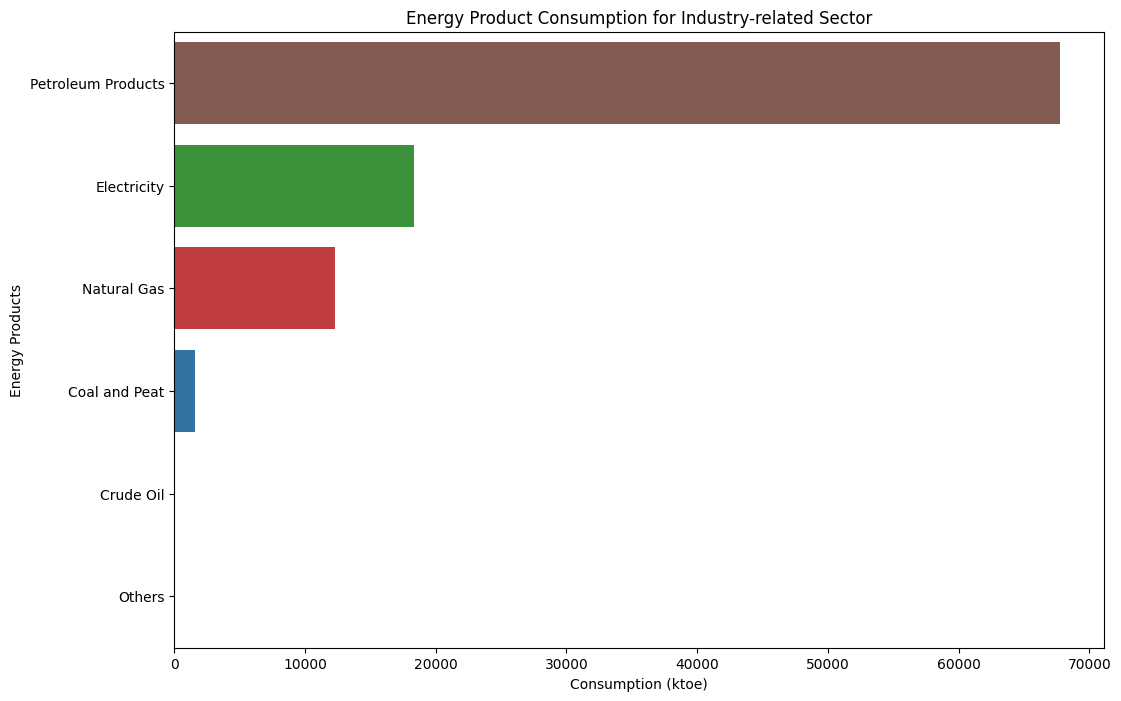

C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2037337240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)


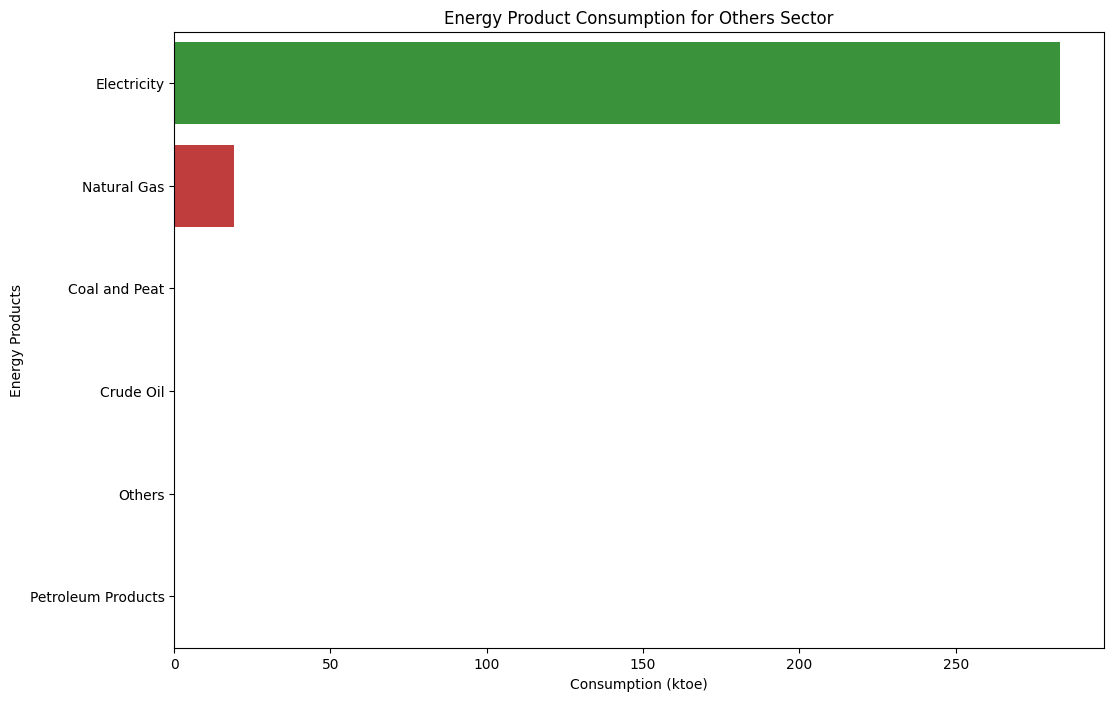

C:\Users\Ken\AppData\Local\Temp\ipykernel_22908\2037337240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consumption_ktoe', y='energy_products', data=aggregated_data, palette=bar_colors)


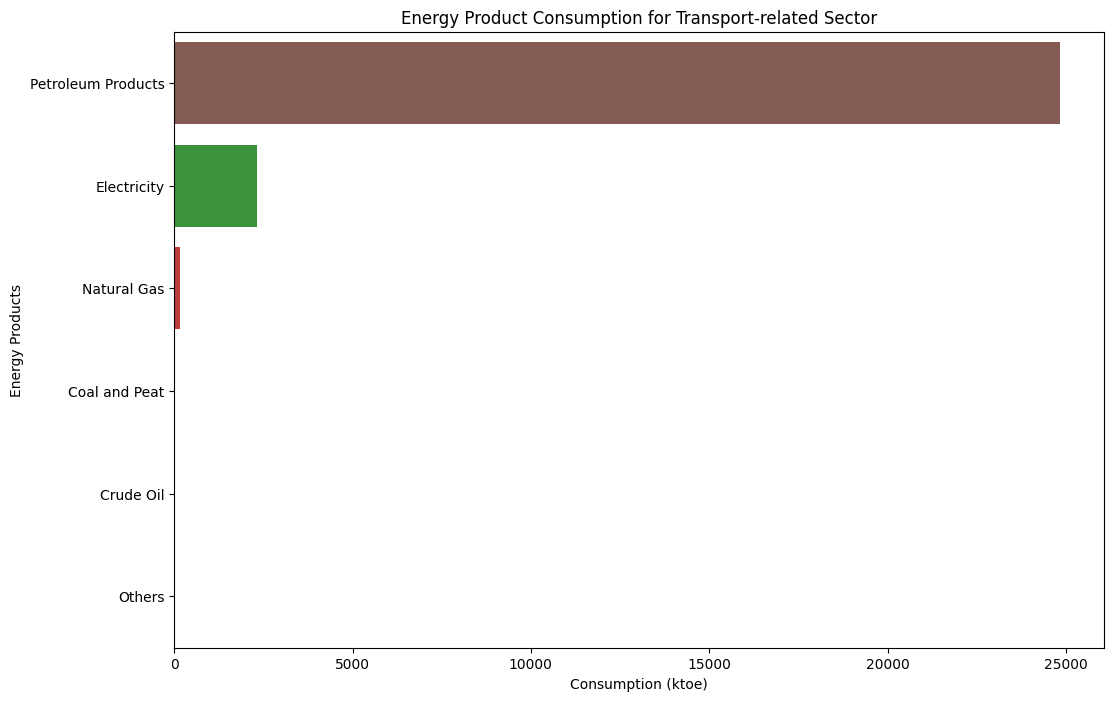

In [23]:
#Use the Functions to Analyze and Visualize Data for Each Sector
# Get the list of unique sectors to iterate over
sectors = total_energy_consumption['sector'].unique()

# Loop through each sector and plot the breakdown of consumption by energy product
for sector in sectors:
    # Strip whitespace and convert to lowercase for consistent comparison
    sector = sector.strip().lower()
    aggregated_data = aggregate_by_product(total_energy_consumption, sector)
    if not aggregated_data.empty:
        plot_product_consumption(aggregated_data, sector)
    else:
        print(f"No consumption data available for sector: {sector}")
